In [7]:
library(Seurat)
#library(SCopeLoomR)
library(AUCell)
library(SCENIC)
library(dplyr)
library(KernSmooth)
library(RColorBrewer)
library(plotly)
library(BiocParallel)
library(grid)
library(ComplexHeatmap)
library(data.table)
#auc=readRDS(file = "auc.rds")
sce=readRDS(file = "../02-Subtype/scRNA_annodata.KC.rds")
sce$celltype.g <- paste(sce$celltype2, sce$group, sep = "_")
head(sce,2)

,orig.ident,nCount_RNA,nFeature_RNA,sample,group,group2,percent.mito,integrated_snn_res.1.8,seurat_clusters,integrated_snn_res.1.6,integrated_snn_res.1.5,integrated_snn_res.1.9,celltype,celltype2,celltype3,RNA_snn_res.2.8,GC1,SC1,BC1,celltype.g
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<fct>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>
Skin-Y-18_AAACCTGCACAGTCGC-18,Skin-Y-18,10128,3125,Skin-Y-18,young,18,0.07099131,0,2,2,0,3,2:SC,SC,KC,2,-0.04911731,2.192695,-0.4098248,SC_young
Skin-Y-18_AAACCTGGTCTCAACA-18,Skin-Y-18,4145,1426,Skin-Y-18,young,18,0.14282268,9,4,14,11,10,4:SC,SC,KC,4,-0.24075157,1.622463,0.6968192,SC_young


# 相关性

In [5]:
scenicLoomPath='sample_SCENIC.loom'
loom <- open_loom(scenicLoomPath)

regulons_incidMat <- get_regulons(loom, column.attr.name="Regulons")
regulons_incidMat[1:4,1:4] 
saveRDS(regulons_incidMat,'regulons_incidMat.rds')

ERROR: Error in open_loom(scenicLoomPath): could not find function "open_loom"


In [8]:
regulons_incidMat=readRDS('regulons_incidMat.rds')

In [11]:
load('../for_rss_and_visual.Rdata')
head(cellTypes)
sub_regulonAUC[1:4,1:2] 
sub_regulonAUC <- sub_regulonAUC[onlyNonDuplicatedExtended(rownames(sub_regulonAUC)),] 
auc=getAUC(sub_regulonAUC)
head(auc,2)

,celltype
,<chr>
Skin-Y-18_AAACCTGCACAGTCGC-18,SC_young
Skin-Y-18_AAACCTGGTCTCAACA-18,SC_young
Skin-Y-18_AAACCTGGTGTAACGG-18,SC_young
Skin-Y-18_AAACGGGCACACCGAC-18,BC_young
Skin-Y-18_AAACGGGTCGATAGAA-18,SC_young
Skin-Y-18_AAACGGGTCGCGTTTC-18,SC_young


AUC for 4 regulons (rows) and 2 cells (columns).

Top-left corner of the AUC matrix:
           cells
regulons    Skin-Y-18_AAACCTGCACAGTCGC-18 Skin-Y-18_AAACCTGGTCTCAACA-18
  ARID5B(+)                    0.02521750                    0.02109775
  ARNT2(+)                     0.02958880                    0.01001944
  ARNTL2(+)                    0.04605937                    0.00000000
  ATF3(+)                      0.07652417                    0.07142110

,Skin-Y-18_AAACCTGCACAGTCGC-18,Skin-Y-18_AAACCTGGTCTCAACA-18,Skin-Y-18_AAACCTGGTGTAACGG-18,Skin-Y-18_AAACGGGCACACCGAC-18,Skin-Y-18_AAACGGGTCGATAGAA-18,Skin-Y-18_AAACGGGTCGCGTTTC-18,Skin-Y-18_AAAGATGAGATGTAAC-18,Skin-Y-18_AAAGATGAGGTGGGTT-18,Skin-Y-18_AAAGATGCAATGCCAT-18,Skin-Y-18_AAAGATGGTCACCTAA-18,⋯,Skin-O-76_TTTGGTTTCAACCATG-76_1,Skin-O-76_TTTGGTTTCCTGTACC-76_1,Skin-O-76_TTTGGTTTCTTCCTTC-76_1,Skin-O-76_TTTGTCACAAAGGTGC-76_1,Skin-O-76_TTTGTCACACACCGCA-76_1,Skin-O-76_TTTGTCACATCCTAGA-76_1,Skin-O-76_TTTGTCACATGTCTCC-76_1,Skin-O-76_TTTGTCAGTCCTCCAT-76_1,Skin-O-76_TTTGTCAGTTAGGGTG-76_1,Skin-O-76_TTTGTCATCCTTGACC-76_1
ARID5B(+),0.0252175,0.02109775,0.02263306,0.04983367,0.02862078,0.03744882,0.05147134,0.02116172,0.06563460,0.06005629,⋯,0.05616684,0.03683470,0.04026356,0.06255118,0.03222876,0.04820880,0.02746929,0.07395087,0.01855169,0.02982344
ARNT2(+),0.0295888,0.01001944,0.03454687,0.01280835,0.03022734,0.02704403,0.03465016,0.02593598,0.02737269,0.02283718,⋯,0.04932719,0.02710976,0.04187130,0.01665837,0.02881880,0.03437785,0.02433024,0.01687435,0.03813396,0.02611439


In [12]:
bc_auc=auc[,rownames(cellTypes)[cellTypes$celltype%in%c('BC_young','BC_middle','BC_aged')]]
dim(bc_auc)

[1]  110 9318

In [13]:
corr.result<-cor(t(bc_auc),method = 'pearson')
head(corr.result)

,ARID5B(+),ARNT2(+),ARNTL2(+),ATF3(+),ATF4(+),ATF6(+),BACH1(+),BCLAF1(+),BHLHE22(+),CEBPA(+),⋯,TFDP1(+),TFEB(+),USF1(+),USF2(+),XBP1(+),YY1(+),ZBTB14(+),ZNF143(+),ZNF597(+),ZNF740(+)
ARID5B(+),1.00000000,0.062475669,0.057205752,0.596296221,0.65362035,-0.013977287,0.13064180,0.01851428,0.015054260,-0.155675397,⋯,-0.013624200,0.19390380,0.053581186,-0.07096478,0.60269761,0.23515048,-0.038672502,-0.023060285,-0.02178289,-0.039489362
ARNT2(+),0.06247567,1.000000000,0.024955868,0.005452264,-0.04311705,0.032252557,0.04047784,0.16553329,0.010894406,0.016618104,⋯,0.036797580,0.09019227,0.108157051,0.07846629,-0.05520722,0.28159358,0.042768752,0.044803281,0.06868011,0.010094686
ARNTL2(+),0.05720575,0.024955868,1.000000000,0.115851013,0.05795899,0.003513247,0.03144831,0.03774627,-0.012090704,-0.001075896,⋯,-0.037854716,0.05906942,0.035202073,0.02644861,0.11618845,0.05547471,0.009156182,-0.003283067,0.01343920,-0.005535297
ATF3(+),0.59629622,0.005452264,0.115851013,1.000000000,0.74536946,-0.030294376,0.10807301,-0.05150038,-0.006116553,-0.049883940,⋯,-0.095817510,0.17554707,0.009107256,-0.12474383,0.75738132,0.17105539,-0.085985324,-0.040602907,-0.04008727,-0.044090349
ATF4(+),0.65362035,-0.043117055,0.057958985,0.745369461,1.00000000,-0.047368174,0.06222716,-0.10930539,-0.008301253,-0.108750563,⋯,-0.013276320,0.18948112,-0.042151147,-0.13588683,0.76890302,0.23930996,-0.097031295,-0.088206904,-0.08246270,-0.045424244
ATF6(+),-0.01397729,0.032252557,0.003513247,-0.030294376,-0.04736817,1.000000000,0.01372900,0.02708898,-0.006637960,0.005078857,⋯,0.007049199,0.01904434,0.021844776,0.02031198,-0.03309109,0.02191236,0.012310044,0.017259068,0.02360398,0.003896867


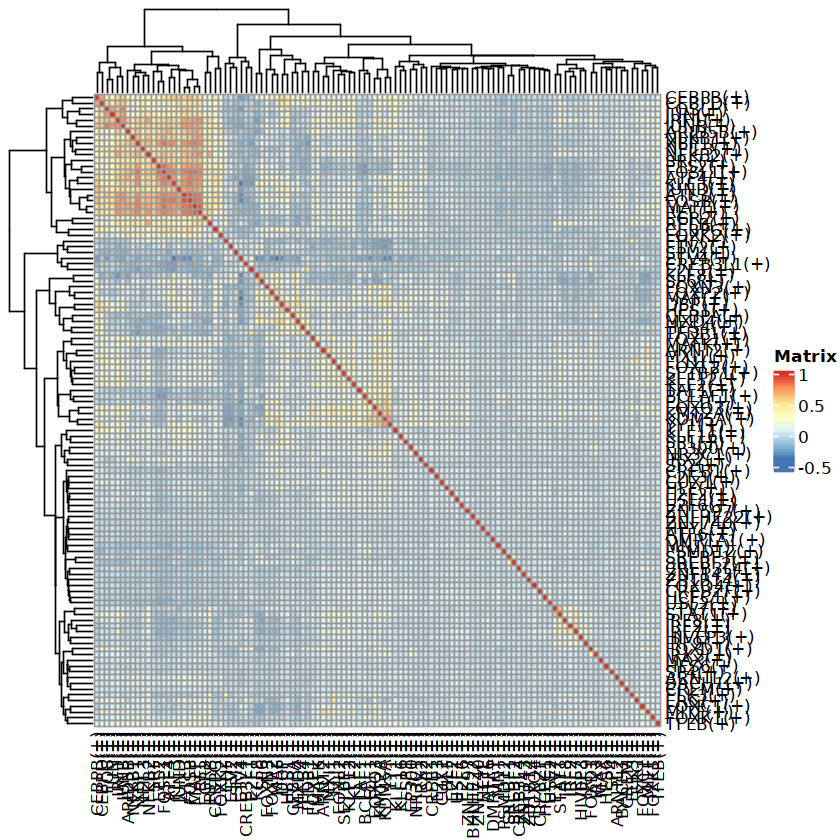

In [18]:
pheatmap(corr.result,scale='none')
ggsave('TF.interaction.cor.png',width = 13,height = 13)
#rownames(corr.result)[p2$tree_row$order]

# 按调控BM排序

In [19]:
regulons <- regulonsToGeneLists(regulons_incidMat)
head(regulons,1)

$`ARID5B(+)`
 [1] "ERRFI1"   "FBLIM1"   "PNRC2"    "GADD45A"  "SYDE2"    "CYR61"   
 [7] "SLC30A7"  "UAP1"     "GPR161"   "KIAA0040" "PROX1"    "MARK1"   
[13] "EDARADD"  "KCNS3"    "ZFP36L2"  "REL"      "SPRED2"   "ACTG2"   
[19] "FHL2"     "FOXP1"    "BOC"      "CHST2"    "TSC22D2"  "RBPJ"    
[25] "UGDH"     "GABRA2"   "AREG"     "EGFLAM"   "PARP8"    "ZSWIM6"  
[31] "HBEGF"    "SQSTM1"   "C6orf141" "DST"      "TBPL1"    "SGK1"    
[37] "CITED2"   "HIVEP2"   "C6orf99"  "C1GALT1"  "MLXIPL"   "HGF"     
[43] "UBE2H"    "NHS"      "TSPYL2"   "GFRA2"    "NKX3-1"   "NRG1"    
[49] "GEM"      "NFIB"     "ZFAND5"   "AGTPBP1"  "KIAA1217" "ARID5B"  
[55] "RRAS2"    "C11orf68" "GNB3"     "POU6F1"   "HOXC9"    "BTG1"    
[61] "SOCS2"    "TCP11L2"  "RGCC"     "TSC22D1"  "EIF3CL"   "NFAT5"   
[67] "ZFHX3"    "LAMA3"    "TAF4B"    "NEDD4L"   "RNF152"   "DNMT3B"  
[73] "RBM39"    "CD40"     "TSHZ2"    "PLEKHG2"  "NRIP1"    "RGS4"    
[79] "RBP5"     "PAX7"

In [20]:
over=function(regulon,target){
    over=sum(target%in%regulon)
    return(over)
}

In [21]:
sabm=read.csv('BMpipeline-SApaper.csv')
head(sabm,2)
bm.confirmed=sabm[sabm$Category=='Basement membrane'&sabm$supportance=='confirmed','Gene.symbol']
length(bm.confirmed)
write.table(bm.confirmed,'bm.confirmed.txt',quote = F,row.names = F,col.names = F)
bm.pathway=unlist(readRDS('../03-Pathscore/bm.pathway.rds')[c('basement membrane')])
length(bm.pathway)

,Gene.symbol,Category,Mouse.ortholog,supportance
,<chr>,<chr>,<chr>,<chr>
1,ACAN,Basement membrane,Acan,confirmed
2,ACHE,Basement membrane,Ache,confirmed


[1] 139

[1] 103

In [25]:
node=data.frame(TF=names(tt2),BMnumber=as.numeric(tt2))
head(node,2)
write.table(node,'node.txt',sep='\t',quote = F,row.names = F)

,TF,BMnumber
,<chr>,<dbl>
1,ARID5B(+),3
2,ARNT2(+),1


In [26]:
library(tidyr)
to_long_data=function(cancer_count){
    cancer_count2=as.data.frame(t(as.matrix(cancer_count)))
    cancer_count2$sample=rownames(cancer_count2)
    cancer_count2=cancer_count2[,c('sample',rownames(cancer_count))]
    cancer_count2=cancer_count2%>% pivot_longer(.,-1,names_to = "gene",values_to = "expr") 
    return(cancer_count2)
}
edge=to_long_data(corr.result)
colnames(edge)=c('from','to','weight')
edge$class='TF'
edge$fromsize=tt2[edge$from]
edge$tosize=tt2[edge$to]
edge=edge[edge$from!=edge$to,]
head(edge)


Warning message:
“package ‘tidyr’ was built under R version 4.1.3”


from,to,weight,class,fromsize,tosize
<chr>,<chr>,<dbl>,<chr>,<int>,<int>
ARID5B(+),ARNT2(+),0.06247567,TF,3,1
ARID5B(+),ARNTL2(+),0.05720575,TF,3,0
ARID5B(+),ATF3(+),0.59629622,TF,3,10
ARID5B(+),ATF4(+),0.65362035,TF,3,8
ARID5B(+),ATF6(+),-0.01397729,TF,3,0
ARID5B(+),BACH1(+),0.13064180,TF,3,0


In [27]:
table(abs(edge$weight)>0.3)
edge2=edge[abs(edge$weight)>0.3,]
write.table(edge2,'edge.txt',sep='\t',quote = F,row.names = F)


FALSE  TRUE 
11226   764 